<a href="https://colab.research.google.com/github/anannyadhar-create/Hospital-Patient-Readmission-Prediction/blob/main/anannya_assesment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score, recall_score, f1_score,
    roc_curve, auc
)


Section A – Data Understanding

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
DATA_PATH = "/content/drive/MyDrive/Colab Notebooks/readmission.csv"

df = pd.read_csv(DATA_PATH)
df.head()


,PatientID,Age,Gender,BMI,BloodPressure,Cholesterol,Diabetes,SmokingStatus,NumVisitsLastYear,HospitalStayDays,MedicationCount,InsuranceType,City,Readmitted
0,P001,25.0,Male,24.5,120.0,180.0,No,Non-Smoker,1.0,2,2,Public,Dhaka,No
1,P002,67.0,Female,31.2,145.0,240.0,Yes,Former,5.0,10,6,Private,Chattogram,Yes
2,P003,54.0,Female,NaN,138.0,220.0,Yes,Smoker,4.0,8,5,Public,Dhaka,Yes
3,P004,38.0,Male,27.0,125.0,NaN,No,Non-Smoker,2.0,3,3,Public,Sylhet,No
4,P005,72.0,Male,29.8,150.0,260.0,Yes,Former,6.0,12,7,Private,Rajshahi,Yes


In [ ]:
print("Shape:", df.shape)


Shape: (20, 13)


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                19 non-null     float64
 1   Gender             20 non-null     object 
 2   BMI                18 non-null     float64
 3   BloodPressure      19 non-null     float64
 4   Cholesterol        18 non-null     float64
 5   Diabetes           20 non-null     object 
 6   SmokingStatus      20 non-null     object 
 7   NumVisitsLastYear  19 non-null     float64
 8   HospitalStayDays   20 non-null     int64  
 9   MedicationCount    20 non-null     int64  
 10  InsuranceType      20 non-null     object 
 11  City               20 non-null     object 
 12  Readmitted         20 non-null     object 
dtypes: float64(5), int64(2), object(6)
memory usage: 2.2+ KB


In [ ]:
df.isna().sum()


,0
Age,1
Gender,0
BMI,2
BloodPressure,1
Cholesterol,2
Diabetes,0
SmokingStatus,0
NumVisitsLastYear,1
HospitalStayDays,0
MedicationCount,0


In [ ]:
numeric_cols_A = df.select_dtypes(include=["number"]).columns.tolist()
categorical_cols_A = df.select_dtypes(exclude=["number"]).columns.tolist()

print("Numeric columns:", numeric_cols_A)
print("Categorical columns:", categorical_cols_A)


Numeric columns: ['Age', 'BMI', 'BloodPressure', 'Cholesterol', 'NumVisitsLastYear', 'HospitalStayDays', 'MedicationCount']
Categorical columns: ['Gender', 'Diabetes', 'SmokingStatus', 'InsuranceType', 'City', 'Readmitted']


Section B — Data Cleaning

In [ ]:
if "PatientID" in df.columns:
    df = df.drop(columns=["PatientID"])
df.head()


,Age,Gender,BMI,BloodPressure,Cholesterol,Diabetes,SmokingStatus,NumVisitsLastYear,HospitalStayDays,MedicationCount,InsuranceType,City,Readmitted
0,25.0,Male,24.5,120.0,180.0,No,Non-Smoker,1.0,2,2,Public,Dhaka,No
1,67.0,Female,31.2,145.0,240.0,Yes,Former,5.0,10,6,Private,Chattogram,Yes
2,54.0,Female,NaN,138.0,220.0,Yes,Smoker,4.0,8,5,Public,Dhaka,Yes
3,38.0,Male,27.0,125.0,NaN,No,Non-Smoker,2.0,3,3,Public,Sylhet,No
4,72.0,Male,29.8,150.0,260.0,Yes,Former,6.0,12,7,Private,Rajshahi,Yes


In [ ]:
print("Missing Readmitted before:", df["Readmitted"].isna().sum())

df = df.dropna(subset=["Readmitted"]).reset_index(drop=True)

print("Missing Readmitted after:", df["Readmitted"].isna().sum())


Missing Readmitted before: 0
Missing Readmitted after: 0


In [ ]:
numeric_cols = df.select_dtypes(include=["number"]).columns.tolist()
categorical_cols = df.select_dtypes(exclude=["number"]).columns.tolist()

if "Readmitted" in categorical_cols:
    categorical_cols.remove("Readmitted")

print("Numeric columns:", numeric_cols)
print("Categorical columns:", categorical_cols)


Numeric columns: ['Age', 'BMI', 'BloodPressure', 'Cholesterol', 'NumVisitsLastYear', 'HospitalStayDays', 'MedicationCount']
Categorical columns: ['Gender', 'Diabetes', 'SmokingStatus', 'InsuranceType', 'City']


In [ ]:
print("Numeric missing BEFORE:")
print(df[numeric_cols].isna().sum())

for col in numeric_cols:
    df[col] = df[col].fillna(df[col].mean())

print("\nNumeric missing AFTER:")
print(df[numeric_cols].isna().sum())


Numeric missing BEFORE:
Age                  1
BMI                  2
BloodPressure        1
Cholesterol          2
NumVisitsLastYear    1
HospitalStayDays     0
MedicationCount      0
dtype: int64

Numeric missing AFTER:
Age                  0
BMI                  0
BloodPressure        0
Cholesterol          0
NumVisitsLastYear    0
HospitalStayDays     0
MedicationCount      0
dtype: int64


In [ ]:
print("Categorical missing BEFORE:")
print(df[categorical_cols].isna().sum())

for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

print("\nCategorical missing AFTER:")
print(df[categorical_cols].isna().sum())


Categorical missing BEFORE:
Gender           0
Diabetes         0
SmokingStatus    0
InsuranceType    0
City             0
dtype: int64

Categorical missing AFTER:
Gender           0
Diabetes         0
SmokingStatus    0
InsuranceType    0
City             0
dtype: int64


In [ ]:
df.isna().sum()


,0
Age,0
Gender,0
BMI,0
BloodPressure,0
Cholesterol,0
Diabetes,0
SmokingStatus,0
NumVisitsLastYear,0
HospitalStayDays,0
MedicationCount,0


Section C — Encoding & Feature Engineering

In [ ]:
df["Readmitted"] = df["Readmitted"].astype(str).str.strip().str.lower()
df["Readmitted"] = df["Readmitted"].map({"yes": 1, "no": 0})

print(df["Readmitted"].value_counts(dropna=False))


Readmitted
0    10
1    10
Name: count, dtype: int64


In [ ]:
df["RiskScore"] = (df["BMI"] + df["BloodPressure"] + df["Cholesterol"]) / 3
df[["BMI", "BloodPressure", "Cholesterol", "RiskScore"]].head()


,BMI,BloodPressure,Cholesterol,RiskScore
0,24.500000,120.0,180.000000,108.166667
1,31.200000,145.0,240.000000,138.733333
2,28.422222,138.0,220.000000,128.807407
3,27.000000,125.0,221.944444,124.648148
4,29.800000,150.0,260.000000,146.600000


In [ ]:
X = df.drop(columns=["Readmitted"])
y = df["Readmitted"]

X.shape, y.shape


((20, 13), (20,))

In [ ]:
ohe_cols = ["Gender", "Diabetes", "SmokingStatus", "InsuranceType", "City"]

# OneHotEncode using pandas
X_encoded = pd.get_dummies(X, columns=ohe_cols, drop_first=False)
X_encoded.head()


,Age,BMI,BloodPressure,Cholesterol,NumVisitsLastYear,HospitalStayDays,MedicationCount,RiskScore,Gender_Female,Gender_Male,...,SmokingStatus_Former,SmokingStatus_Non-Smoker,SmokingStatus_Smoker,InsuranceType_Private,InsuranceType_Public,City_Chattogram,City_Dhaka,City_Khulna,City_Rajshahi,City_Sylhet
0,25.0,24.500000,120.0,180.000000,1.0,2,2,108.166667,False,True,...,False,True,False,False,True,False,True,False,False,False
1,67.0,31.200000,145.0,240.000000,5.0,10,6,138.733333,True,False,...,True,False,False,True,False,True,False,False,False,False
2,54.0,28.422222,138.0,220.000000,4.0,8,5,128.807407,True,False,...,False,False,True,False,True,False,True,False,False,False
3,38.0,27.000000,125.0,221.944444,2.0,3,3,124.648148,False,True,...,False,True,False,False,True,False,False,False,False,True
4,72.0,29.800000,150.0,260.000000,6.0,12,7,146.600000,False,True,...,True,False,False,True,False,False,False,False,True,False


Section D — Scaling & Splitting

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

X_scaled.shape


(20, 22)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.25, random_state=2
)

print("Train:", X_train.shape, "Test:", X_test.shape)


Train: (15, 22) Test: (5, 22)


Section E — Model Training

In [ ]:
lr = LogisticRegression(max_iter=2000)
lr.fit(X_train, y_train)

print("Logistic Regression trained.")


Logistic Regression trained.


In [ ]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

print("KNN (k=7) trained.")


KNN (k=7) trained.


Section F — Evaluation Metrics

In [ ]:
y_pred_lr = lr.predict(X_test)
y_pred_knn = knn.predict(X_test)

y_prob_lr = lr.predict_proba(X_test)[:, 1]
y_prob_knn = knn.predict_proba(X_test)[:, 1]


In [ ]:
print("Logistic Regression Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("\nKNN Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))


Logistic Regression Confusion Matrix:
 [[2 0]
 [0 3]]

KNN Confusion Matrix:
 [[2 0]
 [0 3]]


In [ ]:
def print_metrics(name, y_true, y_pred):
    print(f"\n{name}")
    print("Accuracy :", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred, zero_division=0))
    print("Recall   :", recall_score(y_true, y_pred, zero_division=0))
    print("F1-score :", f1_score(y_true, y_pred, zero_division=0))

print_metrics("Logistic Regression", y_test, y_pred_lr)
print_metrics("KNN (k=7)", y_test, y_pred_knn)



Logistic Regression
Accuracy : 1.0
Precision: 1.0
Recall   : 1.0
F1-score : 1.0

KNN (k=7)
Accuracy : 1.0
Precision: 1.0
Recall   : 1.0
F1-score : 1.0


In [ ]:
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_prob_knn)

auc_lr = auc(fpr_lr, tpr_lr)
auc_knn = auc(fpr_knn, tpr_knn)

print("AUC Logistic Regression:", auc_lr)
print("AUC KNN:", auc_knn)


AUC Logistic Regression: 1.0
AUC KNN: 1.0


Section G — Visualization

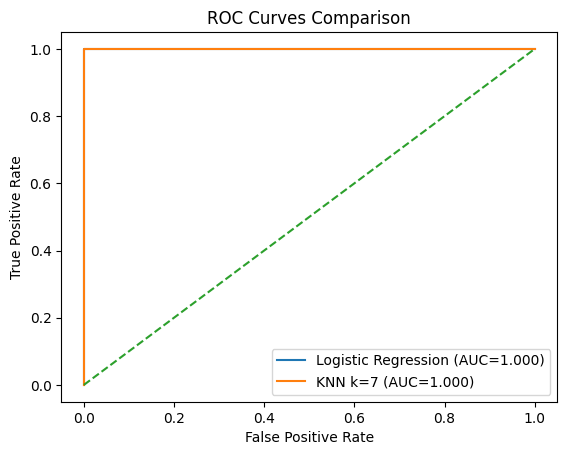

In [ ]:
plt.figure()
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC={auc_lr:.3f})")
plt.plot(fpr_knn, tpr_knn, label=f"KNN k=7 (AUC={auc_knn:.3f})")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves Comparison")
plt.legend()
plt.show()


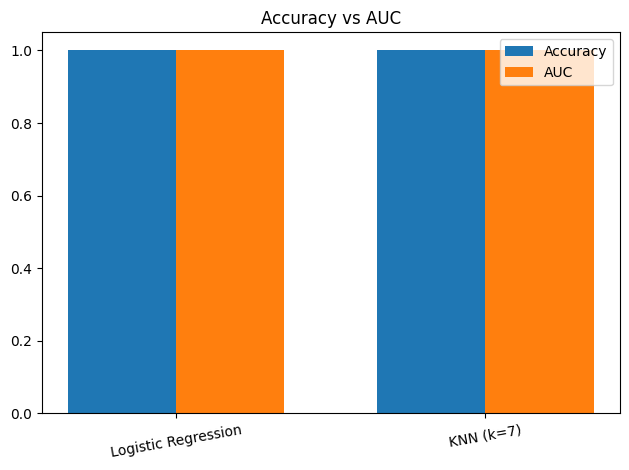

In [ ]:
acc_lr = accuracy_score(y_test, y_pred_lr)
acc_knn = accuracy_score(y_test, y_pred_knn)

models = ["Logistic Regression", "KNN (k=7)"]
accs = [acc_lr, acc_knn]
aucs = [auc_lr, auc_knn]

x = np.arange(len(models))
width = 0.35

plt.figure()
plt.bar(x - width/2, accs, width, label="Accuracy")
plt.bar(x + width/2, aucs, width, label="AUC")
plt.xticks(x, models, rotation=10)
plt.title("Accuracy vs AUC")
plt.legend()
plt.tight_layout()
plt.show()


Section H — Analytical Report